<a href="https://colab.research.google.com/github/tejaswini8213/Perception-Lab/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

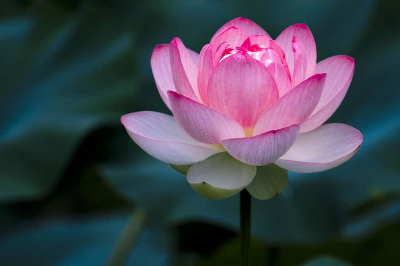

In [8]:
img = cv2.imread('image.jpg')
(h, w) = img.shape[:2]
new_width = 400
aspect_ratio = h / w
new_height = int(new_width * aspect_ratio)
image = cv2.resize(img, (new_width, new_height))
cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

In [11]:
from skimage.feature import hog
from skimage import exposure
# Compute HOG features using scikit-image
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Rescale histogram image for better visibility
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

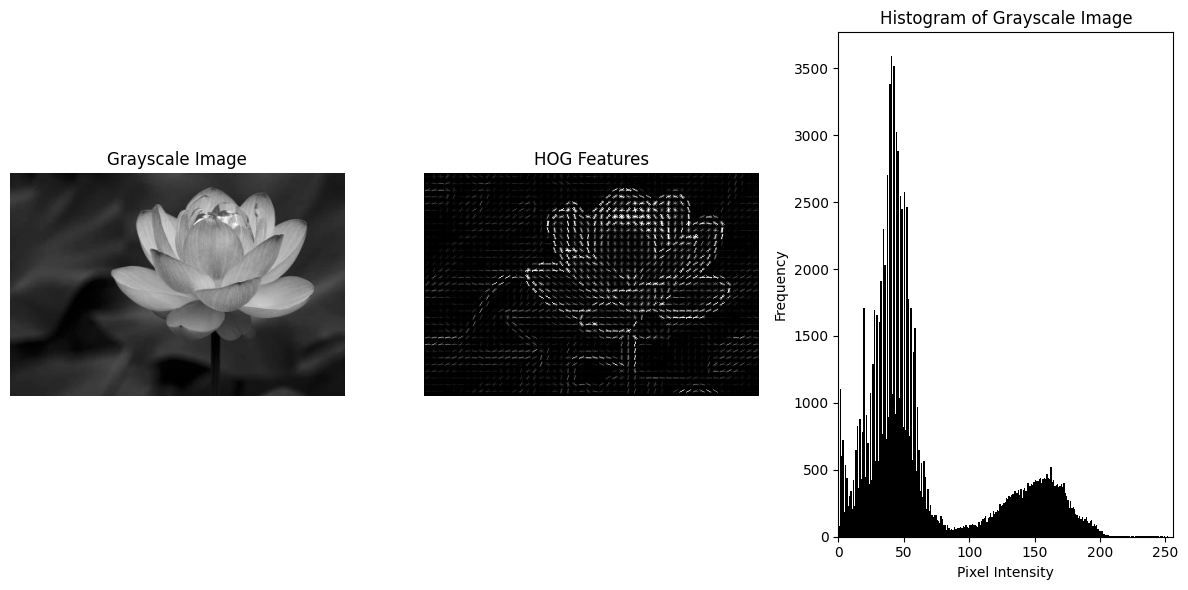

In [13]:
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Grayscale Image')
plt.imshow(image, cmap='gray')  # Display in grayscale (black and white)
plt.axis('off')

# HOG Features
plt.subplot(1, 3, 2)
plt.title('HOG Features')
plt.imshow(hog_image_rescaled, cmap='gray')  # Display in grayscale (black and white)
plt.axis('off')

# Plot Histogram of the Grayscale Image
plt.subplot(1, 3, 3)
plt.title('Histogram of Grayscale Image')
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')  # ravel() flattens the image to 1D
plt.xlim(0, 256)  # Limit x-axis to the intensity range (0-255)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()